# CCE2503 Search and Optimisation
## Assignment
### Year 2024-2025 - Semester II

* Developed by: Adrian Muscat, 2023
* Minor edits: Johann A. Briffa, 2025

---

### Write your name, ID Card Number and class below.

* Name: Luka Cassar
* ID Number: 388806L
* Class: ?

---

## Instructions:

In this assignment you will be looking for a minimiser for the 2D Griewangk
function using the following methods. 

1. Standard Gradient descent
2. Random search
3. Random Search + Gradient descent
4. Simulated annealing

You will also draw convergence plots and compare the methods with each other.

You may be using some of the functions you had developed during the preparatory
stage, e.g. standard gradient descent and python boilerplate code for plotting
contour surfaces, 3D wireframes, timing code, counting function calls etc. 

## Notes: 

1. With the exception of Gradient Descent, for which you shall modify the one in
   the preparatory exercises notebook, program all optimisation algorithms from
   scratch.

2. You can only make use of the python packages included in the notebook in its
   original form, i.e. ('matplotlib.pyplot', 'mpl_toolkits.mplot3d', 'numpy' and
   'time')

3. Cite any blogs, code repositories and/or generative AI tools (e.g. ChatGPT)
   used in completing this assignment. In the case of generative AI tools,
   explain how these tools were used.

4. This work is to be attempted individually. It is essential that the work you
   eventually submit and present for your assignment consists only of your own
   work; use of copied material will be treated as plagiarism. Discussion is
   only permitted on general issues, and it is absolutely forbidden to discuss
   specific details with anyone and/or share results.

5. Please sign the plagiarism form that can be found here:
   https://www.um.edu.mt/ict/students/formsguidelines/

6. Your submission consists of two components:
   * The python notebook, with all cells executed.
   * The signed plagiarism form.

---

## Preparation:

In [1]:
# We first load the required modules
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import time
%matplotlib inline

The Griewangk function is:

$G(\mathbf{x}) = 1 + \frac{1}{4000}x_1^2 + \frac{1}{4000}x_2^2 - 
cos(x_1)cos(\frac{\sqrt(2)}{2}x_2)$

In [2]:
# Define objective function to minimize
def Griewangk(x, a=1, b=5):
    """
    Rosenbrock's function is a 2D uni-modal function
    This implementation follows the definition in Kochenderfer & Wheeler, 2019
    x : x is a numpy array of dimensions [2,m], where m is the number of 2D points
    """
    return 1+ x[0]**2/4000 + x[1]**2/4000 - np.cos(x[0])*np.cos(0.5*x[1]*np.sqrt(2))

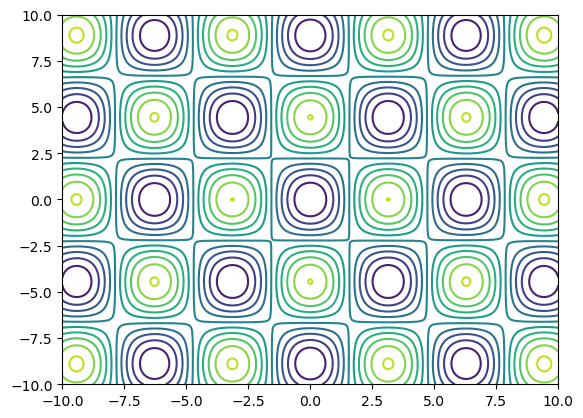

In [3]:
# Plot contour plot in the search space (xmin=-10, ymin=-10), (xmin=10, ymin=10)
N=201
limit=10
xx = np.linspace(-limit, limit, N)
yy = np.linspace(-limit, limit, N)
X = np.repeat(xx,N).reshape(N,N)
Y = np.tile(yy,N).reshape(N,N)
#
x = np.column_stack((X.flatten(),Y.flatten())).T
Z = Griewangk(x).reshape(N,N)
#
plt.contour(X,Y,Z, levels=10)

In [4]:
# Find the location of the minimum value in Z
print(Z.shape)
idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
print(idx, '(',X[idx], ', ', Y[idx],')', Z[idx])
print('Therefore global minimum is at (0.0, 0.0)')

(201, 201)
(100, 100) ( 0.0 ,  0.0 ) 0.0
Therefore global minimum is at (0.0, 0.0)


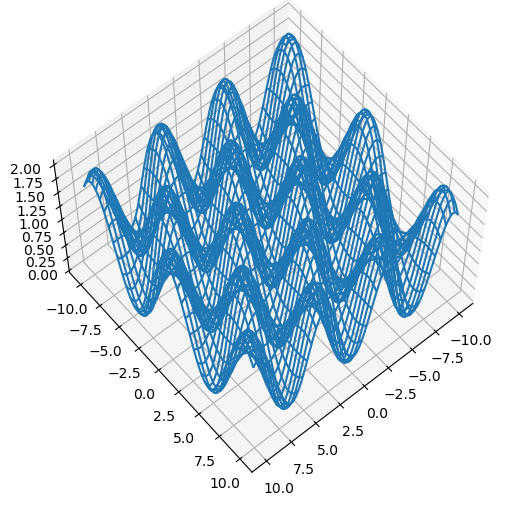

In [5]:
# Plot a 3D wireframe of the objective function
#
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4, cmap=cm.jet)
#ax.plot_wireframe(X, Y, np.log(Z), rstride=2, cstride=2)
#ax.view_init(0, 90) # elevation, azimuth
ax.view_init(60, 50) # elevation, azimuth


---
## Q1

Modify the gradient descent algorithm with the derivate of the $G(\mathbf{x})$ and starting from a random position in the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$, find a minimiser of $G(\mathbf{x})$. 

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [15 marks]

0.0
1.6418373462770988
-4.332008793776058 -9.86234809603145
x, y, z =  -4.4769830494640726 -9.88927773571896 1.2119111024557128


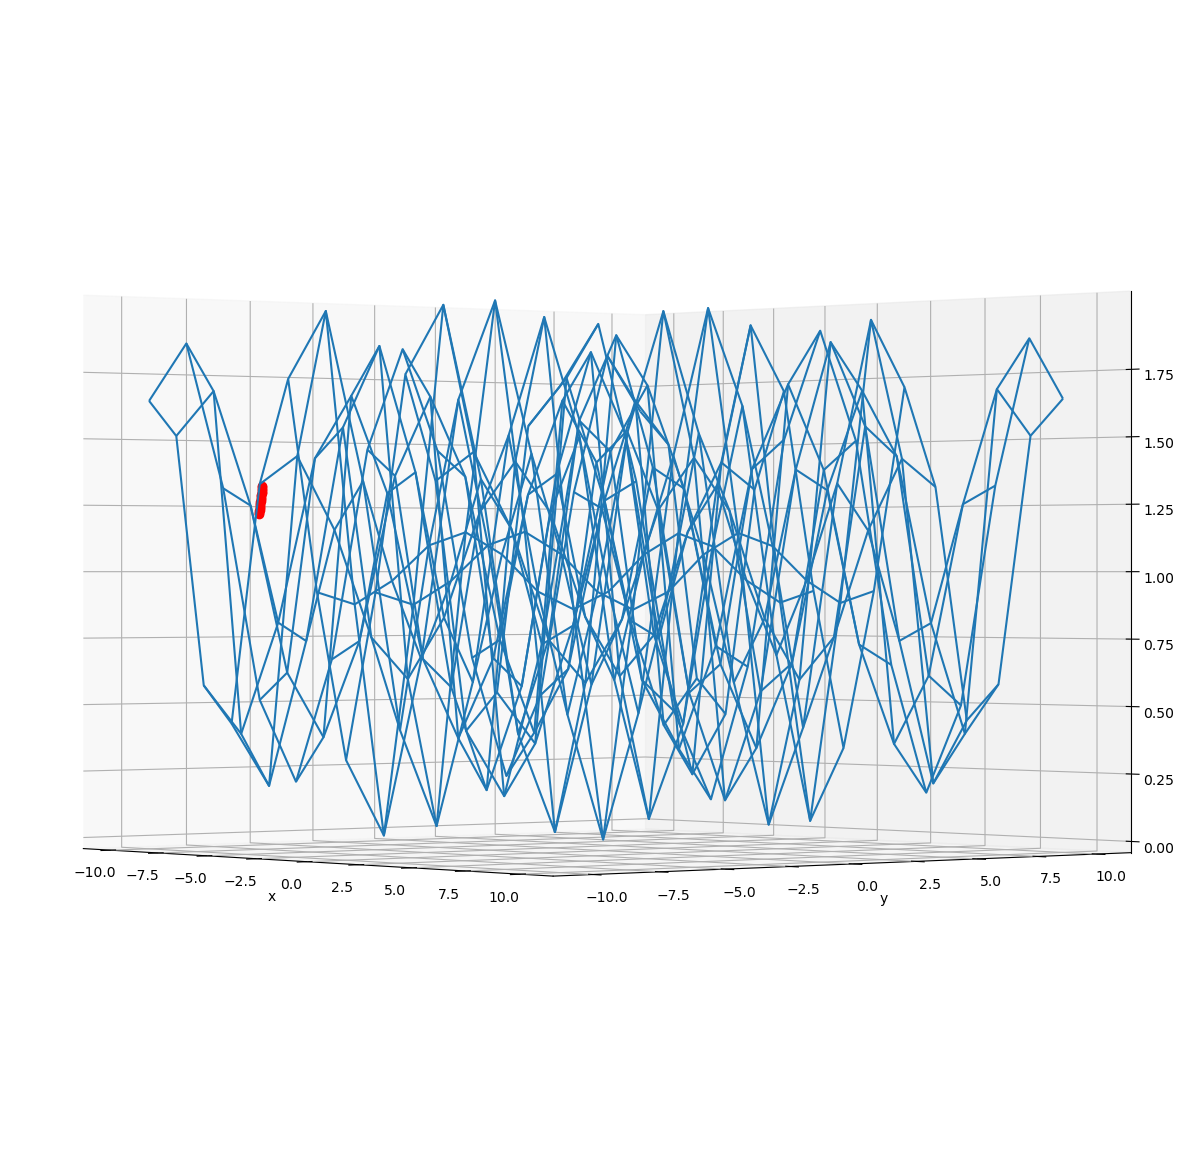

In [6]:
def Griewangk_Gradient(x):
    dx_1 = (x[0] / 2000) + np.sin(x[0]) * np.cos(0.5 * np.sqrt(2) * x[1])
    dx_2 = (x[1] / 2000) + np.cos(x[0]) * np.sqrt(2) * 0.5 * np.sin(0.5 * np.sqrt(2) * x[1])
    return np.array([dx_1, dx_2])

    
N=15
x = np.linspace(-10.,10.,N) 
y = np.linspace(-10,10.,N) 

X = np.repeat(x,N).reshape(N,N)
Y = np.tile(y,N).reshape(N,N)

Z = Griewangk([X,Y])
Z.shape
print(np.min(Z))
print(Z[14,14])

x_, y_ = np.random.uniform(-10, 10, 2)
print(x_, y_)

alpha=0.01
#alpha = 0.8 #converges
#alpha = 0.9 #convergesbut takes longer
#alpha = 1.01 #diverges
N=20
xx = np.zeros(shape=(N),dtype=float)
yy = np.zeros_like(xx)
zz = np.zeros_like(xx)
for itr in range(N):
    xx[itr] = x_
    yy[itr] = y_
    zz[itr] = Griewangk(np.array([x_, y_]))

    grad = Griewangk_Gradient(np.array([x_, y_]))
    x_ = x_ -  alpha * grad[0]  # update equation for x
    y_ = y_ -  alpha * grad[1]  # update equation for y

print("x, y, z = ",x_, y_, zz[-1])

%matplotlib inline

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.plot3D(xx,yy,zz,'ro')
ax.plot3D(xx,yy,zz,'r')
ax.view_init(90, 10) # elevation, azimuth
ax.view_init(65, -40) # elevation, azimuth
ax.view_init(0, -40) # elevation, azimuth
# ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.savefig("bivariate_GD.png")
plt.show()


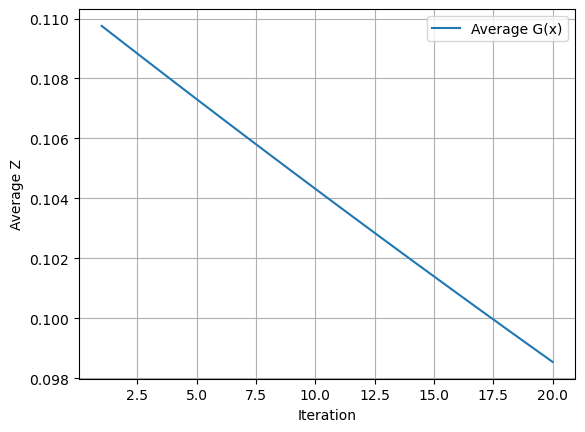

Standard deviation: 0.20145833665505475


In [7]:
averageQ1 = np.zeros((N,))
finalQ1 = []

for i in range(100):
    xx = np.zeros(shape=(N),dtype=float)
    yy = np.zeros_like(xx)
    zz = np.zeros_like(xx)

    for itr in range(N):
        xx[itr] = x_
        yy[itr] = y_
        zz[itr] = Griewangk(np.array([x_, y_]))

        grad = Griewangk_Gradient(np.array([x_, y_]))
        x_ = x_ -  alpha * grad[0]  # update equation for x
        y_ = y_ -  alpha * grad[1]  # update equation for y

    averageQ1 += zz
    finalQ1.append(zz[-1])
averageQ1 /= 100 

plt.figure()  
plt.plot(np.arange(1, N + 1), averageQ1, label='Average G(x)')
plt.xlabel('Iteration')
plt.ylabel('Average Z')
plt.grid(True)
plt.legend()
plt.show()
## chatgpt helped

standardQ1 = np.std(finalQ1)
print(f"Standard deviation: {standardQ1}")

---

## Q2

Implement a random search algorithm  to find a minimiser of $G(\mathbf{x})$ within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [15 marks]

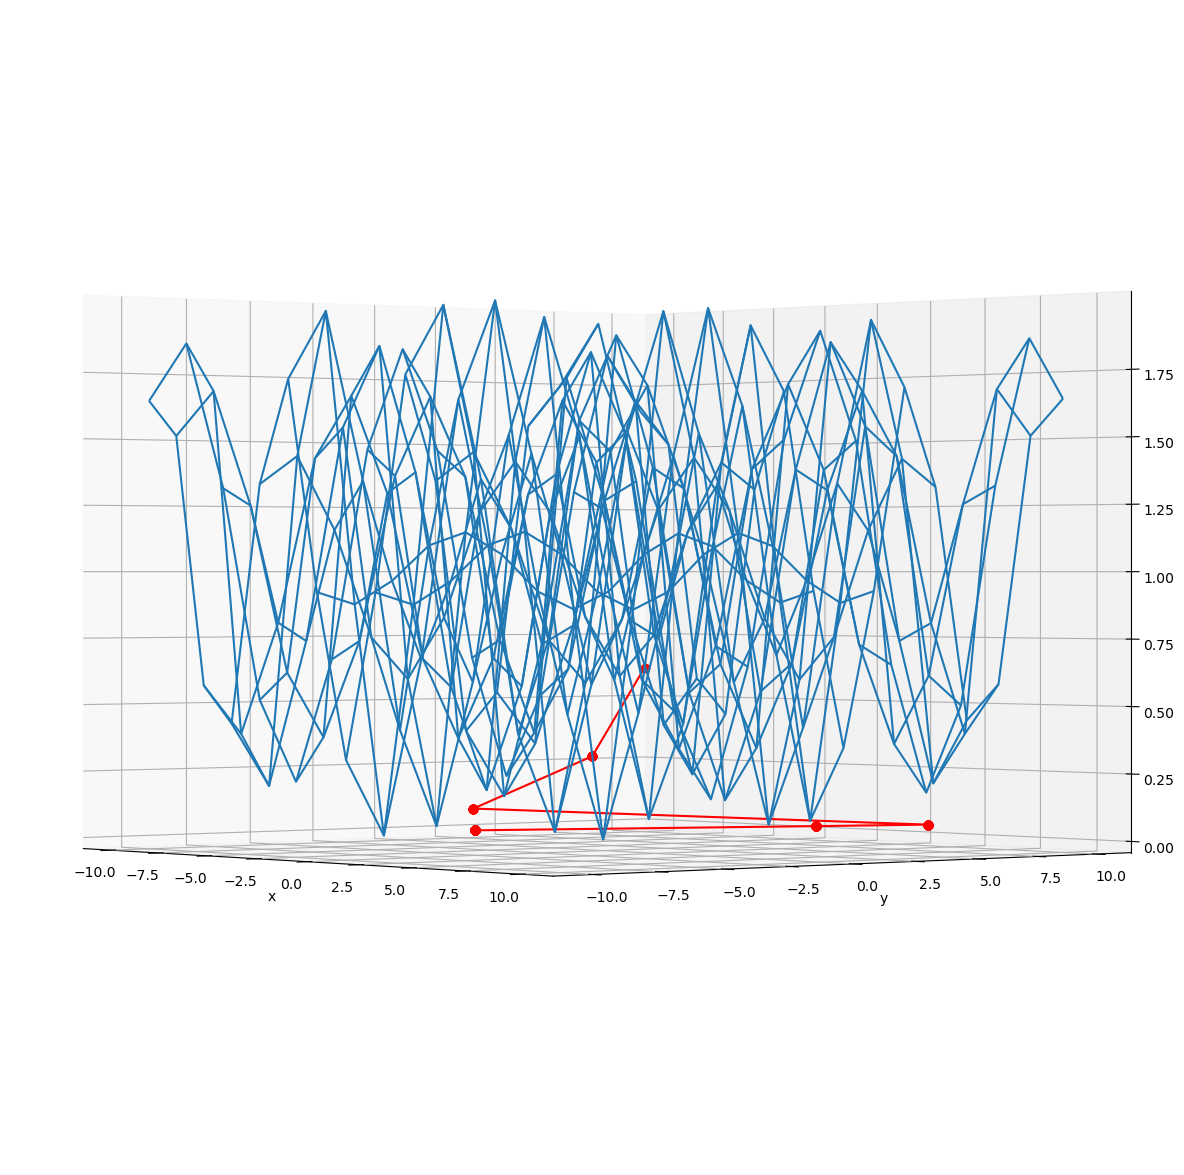

In [8]:
N=15
x = np.linspace(-10.,10.,N) 
y = np.linspace(-10,10.,N) 
X = np.repeat(x,N).reshape(N,N)
Y = np.tile(y,N).reshape(N,N)
Z = Griewangk([X,Y])
Z.shape
x_, y_ = np.random.uniform(-10, 10, 2)
alpha=0.01

N = 1000
bestsQ2 = np.zeros((100, N))

X_all = []
Y_all = []
Z_all = []

for run in range(100):
    x_ = np.random.uniform(-10, 10)
    y_ = np.random.uniform(-10, 10)
    fmin = Griewangk(np.array([x_, y_]))

    for itr in range(N):
        x = np.random.uniform(-10, 10)
        y = np.random.uniform(-10, 10)
        fnow = Griewangk(np.array([x, y]))

        if fnow < fmin:
            x_ = x
            y_ = y
            fmin = fnow

        bestsQ2[run, i] = fmin
        X_all.append(x_)
        Y_all.append(y_)
        Z_all.append(fmin)

X_all = np.array(X_all)
Y_all = np.array(Y_all)
Z_all = np.array(Z_all)

step_indices = np.arange(run * N, (run + 1) * N)
xx = X_all[step_indices]
yy = Y_all[step_indices]
zz = Z_all[step_indices]

%matplotlib inline
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.plot3D(xx,yy,zz,'ro')
ax.plot3D(xx,yy,zz,'r')
ax.view_init(0, -40)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

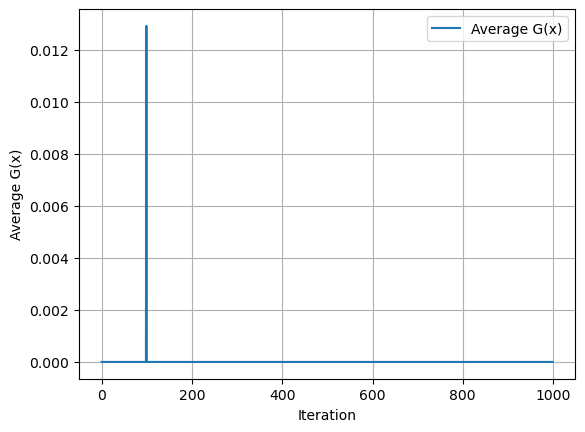

Average final value: 0.0
Standard deviation: 0.0


In [9]:
averageQ2 = np.mean(bestsQ2, axis=0)
standardQ2 = np.std(bestsQ2[:, -1])

plt.figure()
plt.plot(averageQ2, label='Average G(x)')
plt.xlabel('Iteration')
plt.ylabel('Average G(x)')
plt.grid(True)
plt.legend()
plt.show()

print(f"Average final value: {np.mean(bestsQ2[:, -1])}")
print(f"Standard deviation: {standardQ2}")

---

## Q3

Implement a two step approach:

1. In the first step carry out a random search and find minimiser $\mathbf{x}_{initial}^*$, within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.
2. In the second step use gradient descent and starting from $\mathbf{x}_{initial}^*$ find minimiser $\mathbf{x}_{final}^*$  within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [10 marks]



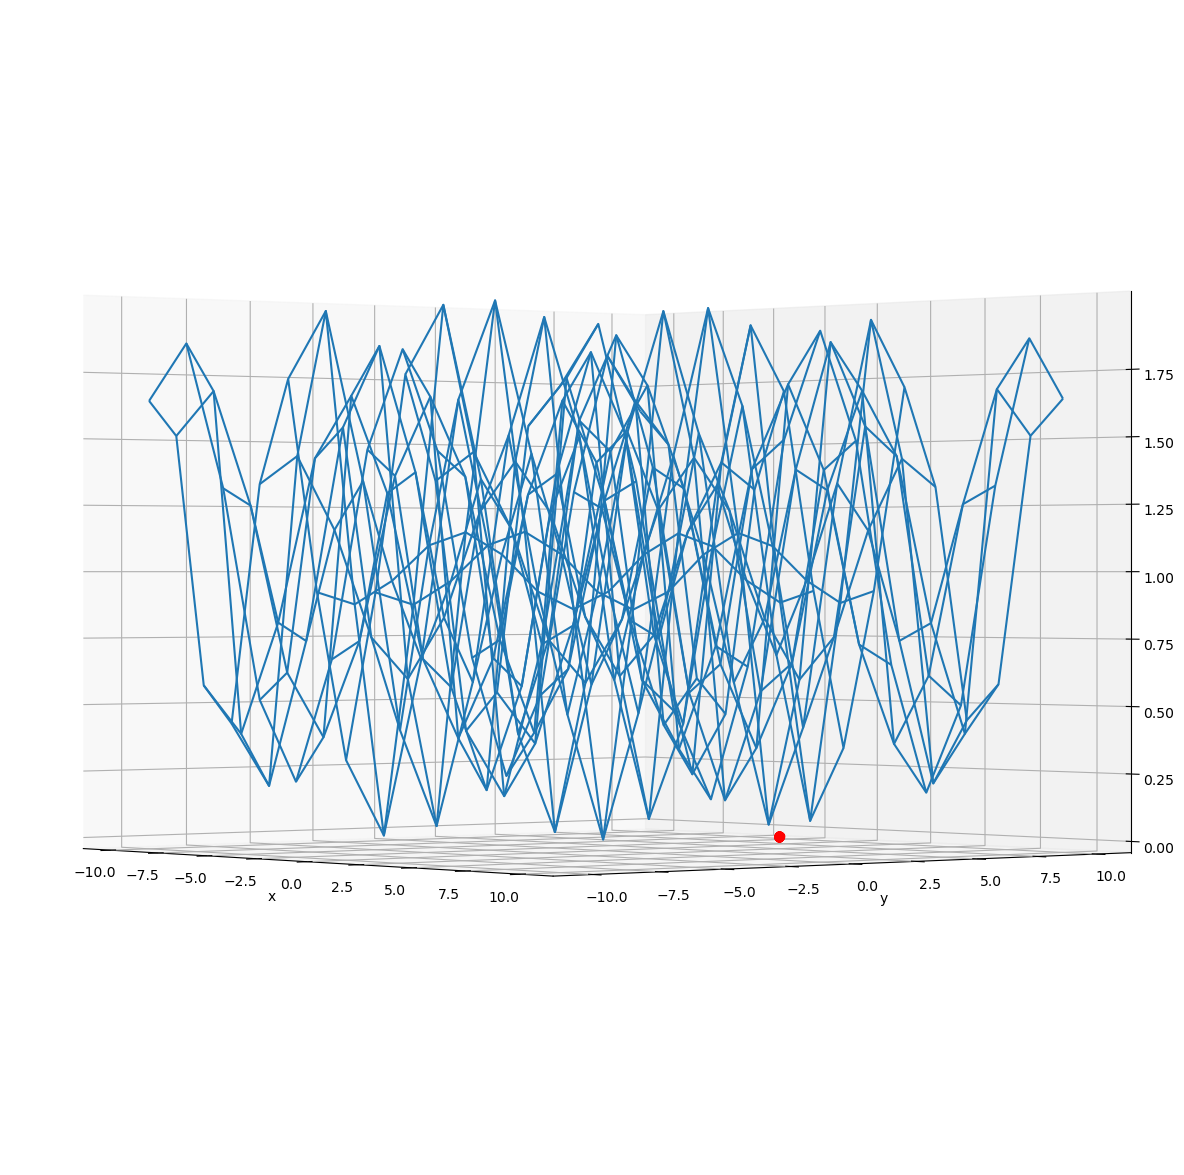

In [10]:
N=15
x = np.linspace(-10.,10.,N) 
y = np.linspace(-10,10.,N) 
X = np.repeat(x,N).reshape(N,N)
Y = np.tile(y,N).reshape(N,N)
Z = Griewangk([X,Y])
Z.shape
x_, y_ = np.random.uniform(-10, 10, 2)
alpha=0.01


N = 100
bestsQ3 = np.zeros((100, N)) 
minimizersQ3 = np.zeros((100, N, 2))  

for i in range(100):
    # RANDOM SEARCH
    x_initial = np.random.uniform(-10, 10, 2)  
    fmin = Griewangk(x_initial)
    
    for _ in range(1000):
        x = np.random.uniform(-10, 10, 2)
        fnow = Griewangk(x)
        if fnow < fmin:
            x_initial = x
            fmin = fnow
    
    # GRADIENT DESENT
    x_vec = x_initial
    for j in range(N):
        grad = Griewangk_Gradient(x_vec)
        x_vec = x_vec - alpha * grad
        x_vec = np.clip(x_vec, -10, 10)  
        bestsQ3[i, j] = Griewangk(x_vec)
        minimizersQ3[i, j] = x_vec  

xx = minimizersQ3[-1, :, 0]
yy = minimizersQ3[-1, :, 1]
zz = np.array([Griewangk([x, y]) for x, y in zip(xx, yy)])

%matplotlib inline

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.plot3D(xx, yy, zz, 'r')
ax.plot3D(xx, yy, zz, 'ro')
ax.view_init(0, -40)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()




Average final value of G(x): 0.008045464481143525
Standard deviation of final G(x): 0.00476269679987351


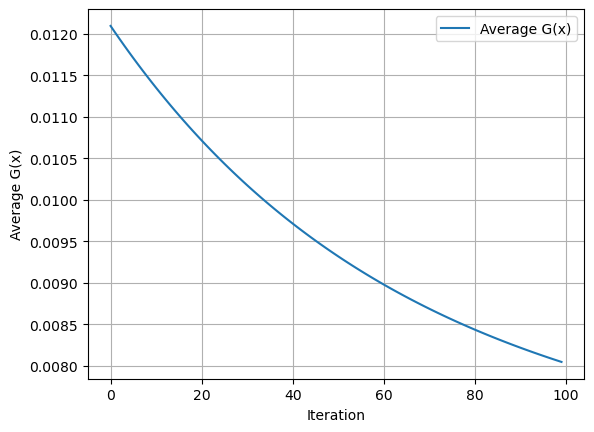

In [11]:
averageQ3 = np.mean(bestsQ3, axis=0)
standardQ3 = np.std(bestsQ3[:, -1])

plt.figure()
plt.plot(averageQ3, label='Average G(x)')
plt.xlabel('Iteration')
plt.ylabel('Average G(x)')
plt.grid(True)
plt.legend()

print(f"Average final value of G(x): {np.mean(bestsQ3[:, -1])}")
print(f"Standard deviation of final G(x): {standardQ3}")

---

## Q4 

Implement a simulated annealing search algorithm  to find a minimiser of $G(\mathbf{x})$ within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [30 marks]

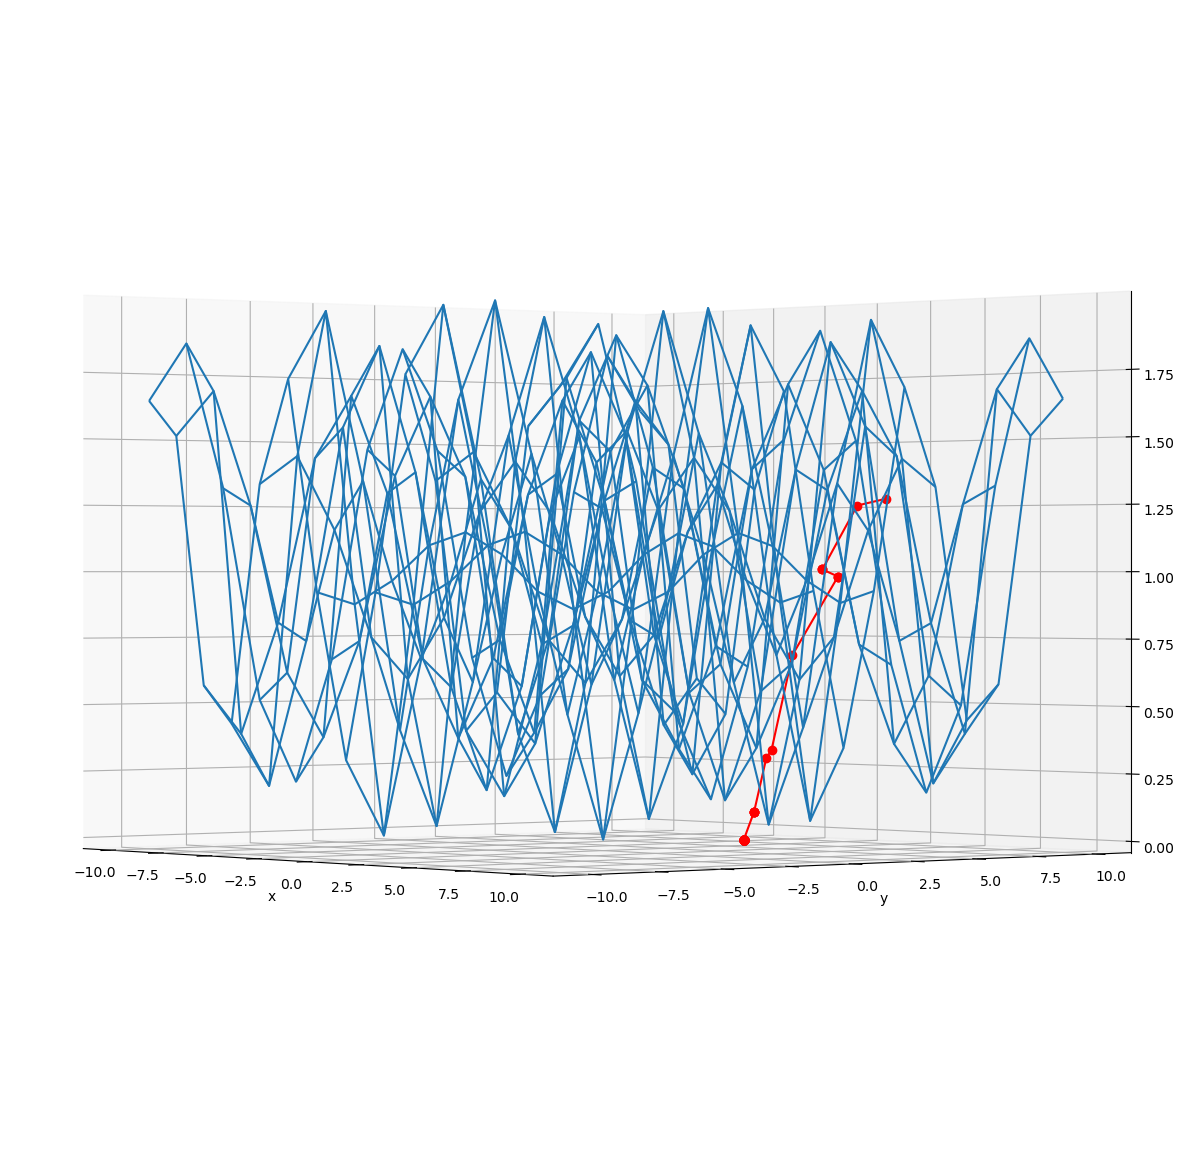

In [12]:
N=15
x = np.linspace(-10.,10.,N) 
y = np.linspace(-10,10.,N) 
X = np.repeat(x,N).reshape(N,N)
Y = np.tile(y,N).reshape(N,N)
Z = Griewangk([X,Y])
Z.shape
x_, y_ = np.random.uniform(-10, 10, 2)
alpha=0.01


N = 100
T0 = 100


bestsQ4 = np.zeros((100, N + 1))
minimizersQ4 = np.zeros((100, N + 1, 2))

for i in range(100):
    x_initial = np.random.uniform(-10, 10, 2)
    fmin = Griewangk(x_initial)
    x_vec = x_initial.copy()
    T = T0
    
    bestsQ4[i, 0] = fmin
    minimizersQ4[i, 0] = x_vec
    
    for j in range(N):
        x_new = x_vec + np.random.normal(0, 1, 2)
        x_new = np.clip(x_new, -10, 10)
        fnow = Griewangk(x_new)
        
        delta = fnow - fmin
        if delta <= 0 or np.random.random() < np.exp(-delta/T):
            x_vec = x_new
            fmin = fnow
        
        T *= alpha
        bestsQ4[i, j + 1] = fmin
        minimizersQ4[i, j + 1] = x_vec

xx = minimizersQ4[-1, :, 0]
yy = minimizersQ4[-1, :, 1]
zz = np.array([Griewangk([x, y]) for x, y in zip(xx, yy)])

%matplotlib inline

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.plot3D(xx, yy, zz, 'r')
ax.plot3D(xx, yy, zz, 'ro')
ax.view_init(0, -40)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()







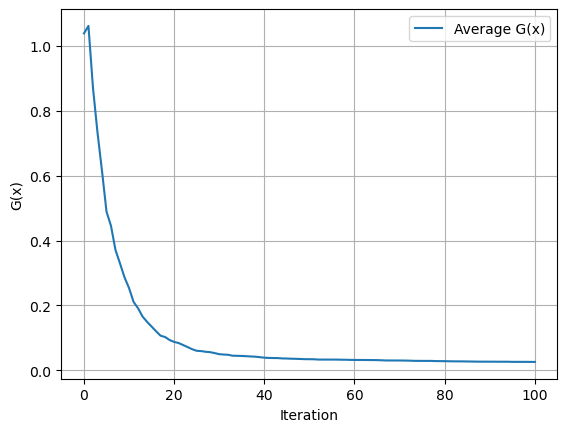

Standard deviation of final values: 0.013706615585829154


In [13]:
averageQ4 = np.mean(bestsQ4, axis=0)
standardQ4 = np.std(bestsQ4[:, -1])

plt.figure()
plt.plot(averageQ4, label='Average G(x)')
plt.xlabel('Iteration')
plt.ylabel('G(x)')
plt.grid(True)
plt.legend()
plt.show()


print(f"Standard deviation of final values: {standardQ4}")

---

## Q5

Superimpose all plots from all four optimisation methods and compare the algorithms in terms of rate of convergence, effectiveness and robustness.

### [30 marks]